# Problem Statement

A bike sharing system , in which the bikes are avialble to user on a rental basis. User shall pay and unlock the bike. Bikes are returned to the designated docking system.<br>

This company suffred low in revenue to the pandamic situation. The organisaion wants to find the factors so that the business can be accelaearted. <br>
We want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

# Business Goal:

- You are required to model the demand for shared bikes with the available independent variables. 
- It will be used by the management to understand how exactly the demands vary with different features. 
- They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
- Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. 
- `The model should be built taking this 'cnt' as the target variable.`

## Understanding  the dataset

1. Loading the data set
2. Cleaning the data by following the standard procedures
3. Univariate Analysis
4. Information Value and Weight Of Evidence - check if it can be applied
5. Bivariate Analysis
6. Creation of Dummy Varaiables
7. Model Building
    - 7.1 Data Preparation
    - A. Model building taking all the fields
    - B. Model building taking half of the fields using RFE and stasmodel
    - C. Model building by taking nearly one-forth of the fields
8. Model Evaluation
    - Predictions and Evaluation on training set
    - Predictions and Evaluation on the test set

### 1. Loading the data set

In [257]:
## Importing the required modules for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [258]:
### importing modules for model building
import sklearn
from sklearn.model_selection import train_test_split   # for splitting traing and test sets
from sklearn.preprocessing import MinMaxScaler         # for rescaling of the data
from sklearn.feature_selection import RFE              # Model building using RFE
from sklearn.linear_model import LinearRegression      # Model building using sklearn
from sklearn.metrics import r2_score,mean_squared_error# Calculating r2 scores and MSE

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [259]:
import sweetviz as sv # For analyzing EDA automatically

In [260]:
## Loading the CSV file and viewing the data

bike_df = pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [261]:
## Getting the shape of the data

print(bike_df.shape)

(730, 16)


### Insight
- Data set consists of 730 rows and 16 columns

In [262]:
## Formatting the view of jupyter notebook

# Setting the maximum rows to 20
pd.set_option('display.max_rows', 20)

# Setting the maximum columns as per the data dictionary, able to view all the avaialable columns for analysis
pd.set_option('display.max_columns', 30)

pd.set_option('display.width', 1000)

In [263]:
## Viewing the data information

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [264]:
## Getting stats from the data set

bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### insight
- The data set contains 730 rows and 16 columns
- Most columns are integer and float data type , will anayle them and convert the datatype accordingly
- Few columns like seoson, weekday, weathersit are treated as numerical column by pandas. The summary staistics for these columns does not make any sense.
- Will convert the values of these columns accordingly

## END OF MODULE
- DATA LOADING DONE

## 2. Data cleaning
- 2.1 Fixing Missing Values
- 2.2 Fix Rows and columns
- 2.3 Standardise Values
- 2.4 Fix invalid values
- 2.5 Filter data

### Fixing missing values

In [265]:
## Checking any null values

bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Insight
- No null values present in the data set

### 2.2 Fix Rows and columns

In [266]:
### Deleting any un-necessary header and footer rows

bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Insight
- Header and Footer rows are fine. Nothing to remove

In [267]:
### Delete Extra rows: Detecting column number indicator, blank rows etc

## Dropping rows which have all null values
print(f'shape of dataframe before dropping rows {bike_df.shape}')
bike_df.dropna(axis='index', how='all', inplace=True)
print(f'shape of dataframe after dropping rows {bike_df.shape}')

shape of dataframe before dropping rows (730, 16)
shape of dataframe after dropping rows (730, 16)


## Insight
- 0 Rows has been deleted
- No rows have all null values

In [268]:
### Add column name if missing


## Insight
- All columns have appropiate column names

### Drop columns

In [269]:
# Analyzing column dteday

print(bike_df.dteday.value_counts().sum())

### Dropping field dteday
bike_df = bike_df.drop(['dteday'], axis=1)

730


### Insight
- This column has all unique values
- Moreover we have the month and year column in the data set which provides more info, this date column might be redundant
- Dropping this column as this may not provide any information on the target field cnt

In [270]:
### Analyzing column instant
print(bike_df.instant.value_counts().sum())

### Dropping field instant
bike_df = bike_df.drop(['instant'], axis=1)

730


### Insight
- This field just holds an indicator of the records
- dropping this field

### Analyzing columns - casual and registered

- As the objective is to work on the total count of bikes rented, the segregation of this count field may not provide much insight and also may arise a condition of multicolinearality

In [271]:
### Dropping field instant
bike_df = bike_df.drop(['casual', 'registered'], axis=1)

In [272]:
print(bike_df.columns)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')


### Drop columns Insight
- Columns dteday and instant are dropped
- Columns `casual` and `registered` also contains data which column `cnt` has
- The condition of <b>multi-colinearality</b> will arise for casual and registered with cnt so dropped them 

### Replacing column values with business terminology 

As per the data dictionary we need to replace the numerical values with the categorical values for the below fields<br>
Will help in creation of dummy variables
- season
- mnth
- weekday
- weathersit


In [273]:
# Replacing the season integer values with business terminologies

# bike_df.season = bike_df.season.astype('category')
bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# bike_df['season'].value_counts()

bike_df['season']

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [274]:
# Setting the mnth values

bike_df.mnth = bike_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [275]:
# Setting the weekday values

bike_df.weekday = bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [276]:
# Setting the weathersit values

bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Mist',3:'Light_snow',4:'Heavy_rain'})

In [277]:
## Viewing the data set
bike_df[['season', 'mnth', 'weekday', 'weathersit']].head()

,season,mnth,weekday,weathersit
0,spring,jan,sat,Mist
1,spring,jan,sun,Mist
2,spring,jan,mon,Clear
3,spring,jan,tue,Clear
4,spring,jan,wed,Clear


In [278]:
bike_df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

## END OF MODULE
- DATA CLEANING DONE


### insights
- No null values present in any columns
- Header and Footer rows are fine
- There are no rows with all null values
- All Columns have column header
- Dropped the column dteday, as date information can be fetched from existing columns mnth and yr
- Dropped the column instant as it is kind of rudundant - storing only the sequence and will not contribute anything in the analysis
- As the target field is cnt, we require to analyse the total count ,the columns casual and registered nay not be significant in this case and can create multi-collinearity
- Categorical column values for season, mnth, weekday and weathersit are replaced with business values

### 3. Univariate Analysis

In [279]:
## For numerical column analysis plotting histogram

def plot_hist(column_name):
    print(f"--- column :: {column_name}")
    plt.figure(figsize = (9,3))
    ax=plt.subplot()
    plt.hist(bike_df[column_name], bins = 50)
    plt.xlabel(column_name)
    
    ## Rotating the ticks by 90 degree if number of values are more than 10
    if bike_df[column_name].nunique() > 10:
        plt.xticks(rotation=90)
    
    plt.ylabel("Count of rented bikes")
    plt.title("{} distribution with hist".format(column_name))
    

    plt.show()
    print(f"{bike_df[column_name].value_counts()}")

In [280]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Univariate :: Numerical Column Analysis

 - Extracting all numerical columns

In [281]:
bike_df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801


In [282]:
num_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

### Plotting the histogram for the numerical columns for more insights

--- column :: temp


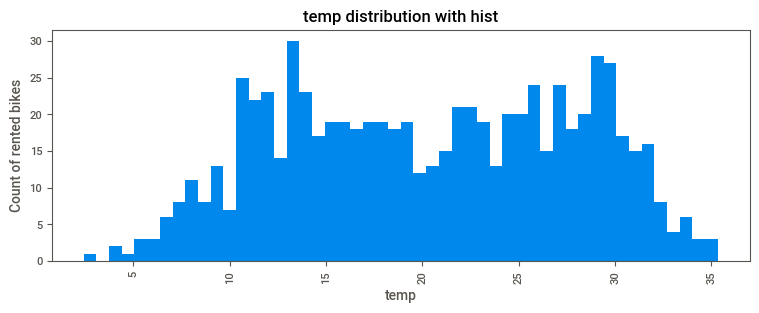

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64
--- column :: atemp


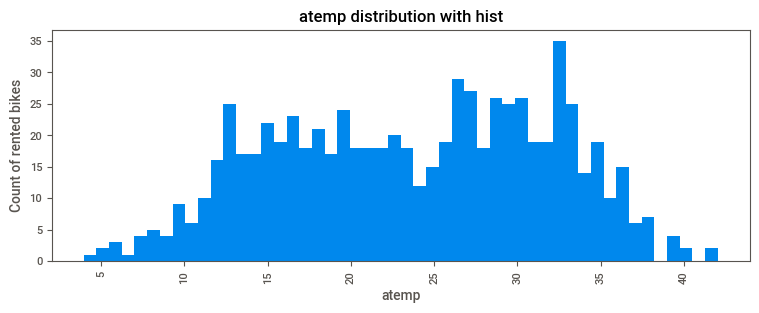

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: atemp, Length: 689, dtype: int64
--- column :: hum


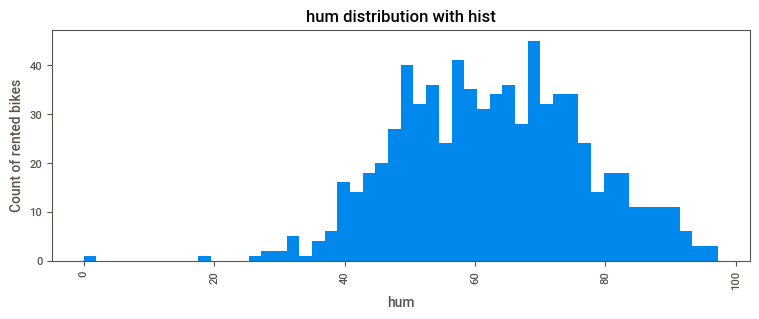

61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.1250    1
57.7500    1
Name: hum, Length: 594, dtype: int64
--- column :: windspeed


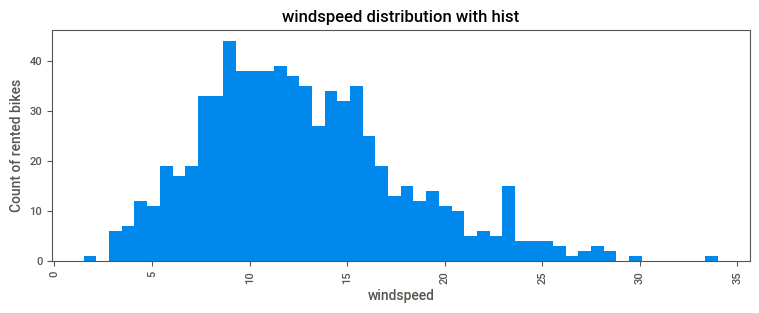

9.041918     3
11.166689    3
11.250104    3
15.333486    3
7.959064     3
            ..
12.416775    1
13.833289    1
14.250632    1
23.044181    1
10.374682    1
Name: windspeed, Length: 649, dtype: int64
--- column :: cnt


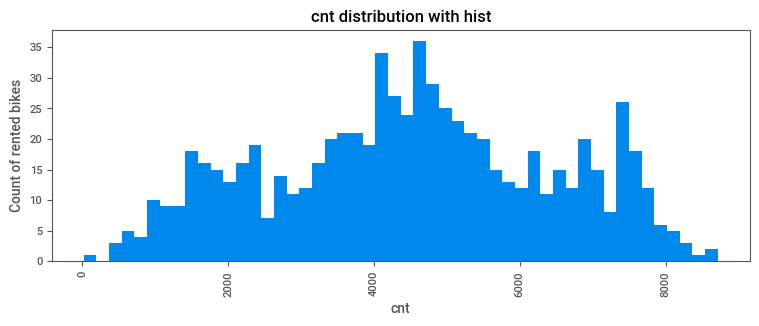

5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5345    1
5046    1
4713    1
4763    1
2729    1
Name: cnt, Length: 695, dtype: int64


In [283]:
## 2. PLotting the histogram

## Creating a loop to plot the histogram
for col in num_columns:
    num_unique_value = bike_df[col].nunique()
    
    # It will ignore the column having all unique values like - id, member_id etc
    if num_unique_value != bike_df.shape[0]:
        plot_hist(col)

### Numerical Column insights
1. Increase in demand of bikes are seen for temperature between 10-15 degree celsius and around 25-30 degree celsius
2. During the days where humidity is within the range of 50-75 there are more bike demands
3. Usage of rental bikes increases from the windspeed 5-15, however there is a decrease in demand post 15.

## Univariate :: Non-Numerical Column Analysis

In [284]:
bike_df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801


In [285]:
## 1. Getting the non-numerical columns

bike_non_num_col = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
print(bike_non_num_col)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


In [286]:
## PLotting a bar plot

def barplot_categorical_column(column_name):
    plt.figure(figsize = (5,4))
    sns.barplot(x=column_name,y='cnt',data=bike_df)
    plt.show()
    

In [287]:
def barplot_yearwise(column_name):
    plt.figure(figsize = (5,4))
    sns.barplot(x=column_name,y='cnt',data=bike_df, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

Column  name - season


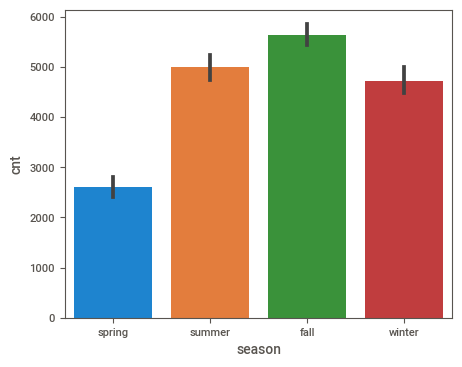

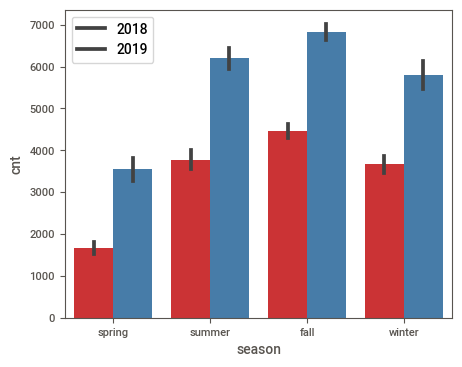

Column  name - yr


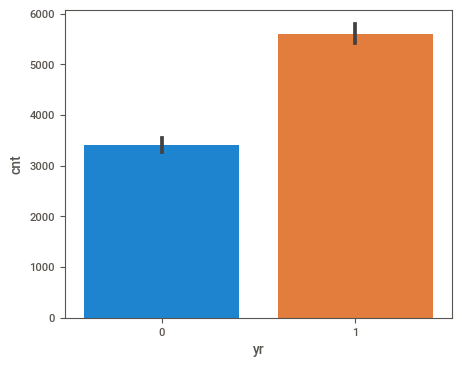

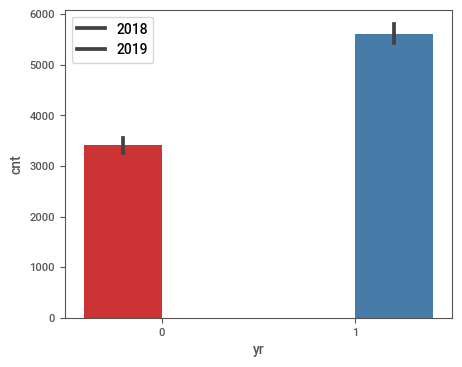

Column  name - mnth


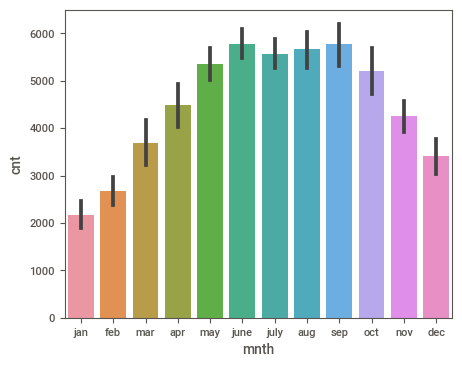

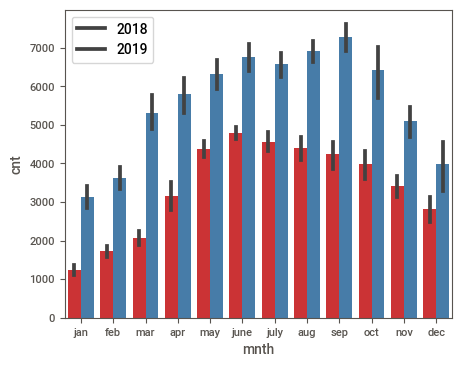

Column  name - holiday


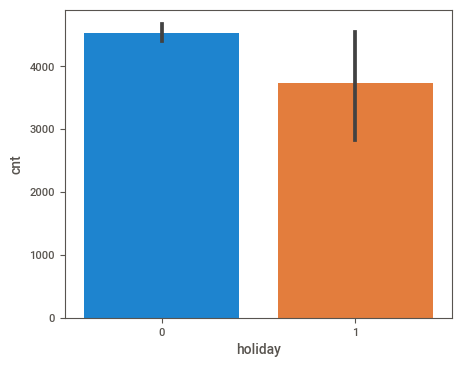

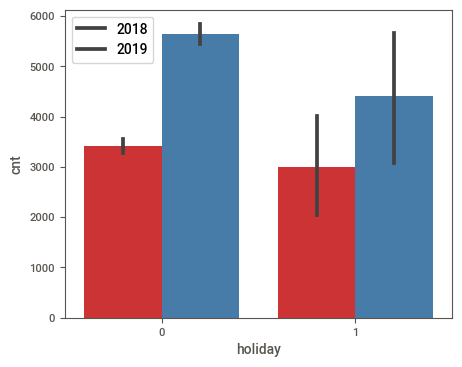

Column  name - weekday


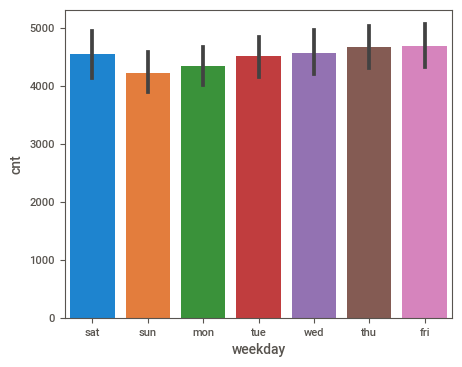

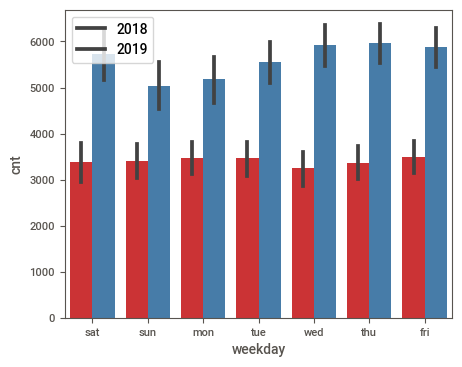

Column  name - workingday


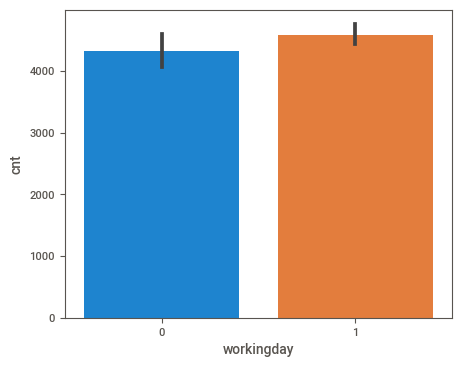

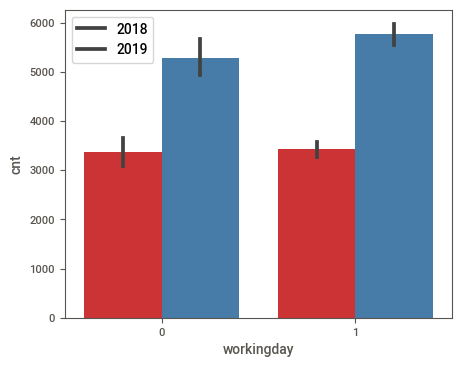

Column  name - weathersit


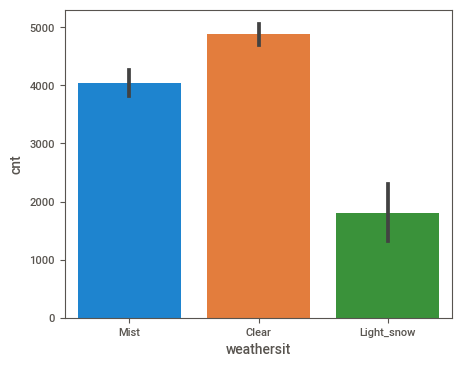

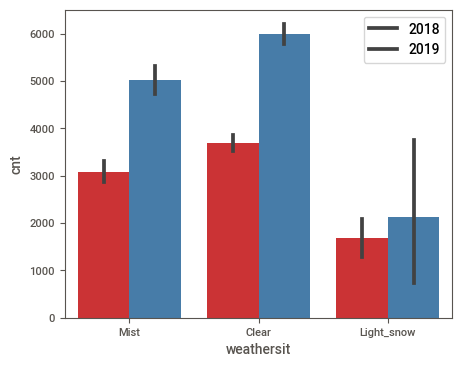

In [288]:
## 2. PLotting the barplot

for col in bike_non_num_col:
    num_unique_value = bike_df[col].nunique()
    if num_unique_value <= 15:
        print(f'Column  name - {col}')
        barplot_categorical_column(col)
        barplot_yearwise(col)

### Categorical columns insights
1. The fall season observed to have a higher demand of rental bikes
2. Clearly the year 2019 have more usage of bikes as compared to year 2018
3. For the months may to oct the demand of bikes are more as compared to other months
4. Bookings are more for a non-holiday as compared to holiday
5. Equal demand can be seen for all the days of the week
6. Books are nearly eqaual for a working and a non-working day

## Analyzing the Outliers

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')


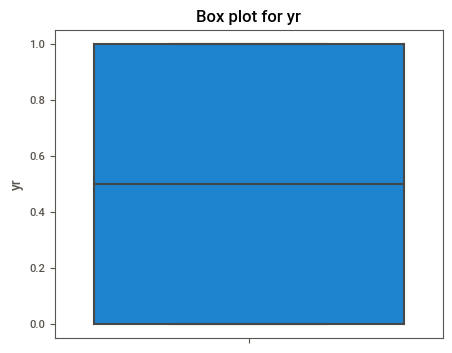

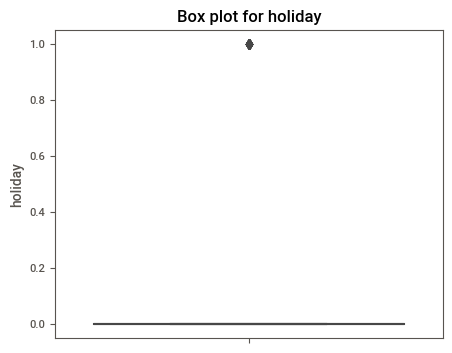

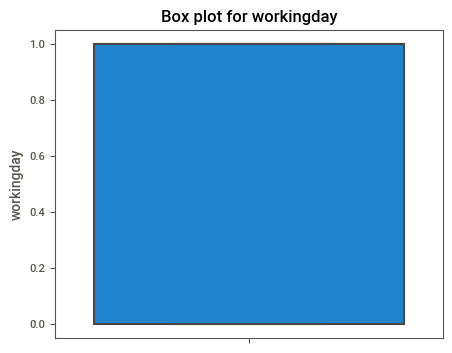

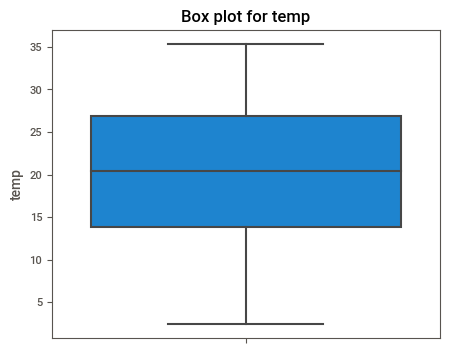

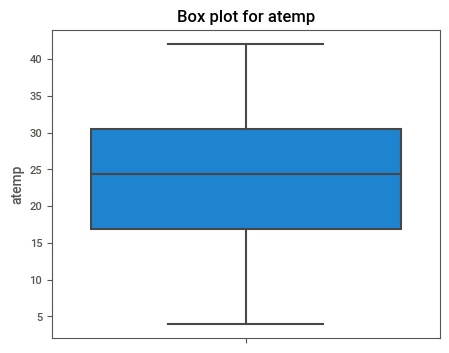

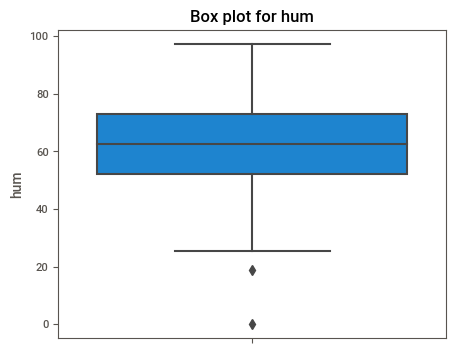

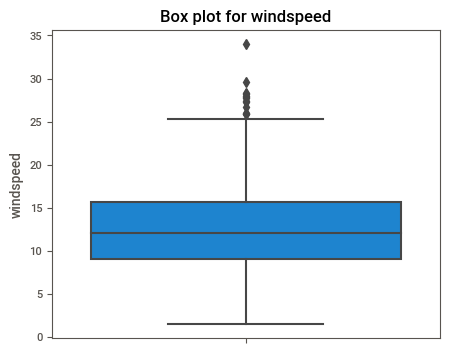

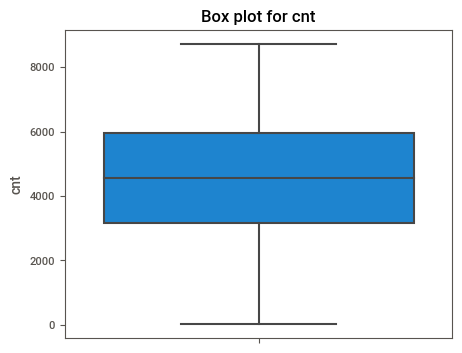

In [289]:
## Analyzing outliers for numerical fields
### creating box plots


### Getting numerical fields
numerical_columns_data = bike_df.select_dtypes(include="number")
print(numerical_columns_data.columns)

def create_boxplot(column_name, dataset):
    plt.figure(figsize=(5,4))
    sns.boxplot(y=col, data=dataset)
    plt.title(f"Box plot for {column_name}")
    plt.show()



for col in numerical_columns_data.columns:
    create_boxplot(col, bike_df)


### Insights
- Few outliers are observed for casuals, windspeed and humidity
- We cannot drop the rows with outliers as the data set is too small ans removing rows might impact the analysis

## End of Module - Univariate Analysis

### Insights of Univariate Analysis
- Numerical Column insights
    1. Increase in demand of bikes are seen for temperature between 10-15 degree celsius and around 25-30 degree celsius
    2. During the days where humidity is within the range of 50-75 there are more bike demands
    3. Usage of rental bikes increases from the windspeed 5-15, however there is a decrease in demand post 15.
- Categorical columns insights
    1. The fall season observed to have a higher demand of rental bikes
    2. Clearly the year 2019 have more usage of bikes as compared to year 2018
    3. For the months may to oct the demand of bikes are more as compared to other months
    4. Bookings are more for a non-holiday as compared to holiday
    5. Equal demand can be seen for all the days of the week
    6. Books are nearly eqaual for a working and a non-working day
- Outliers
     1. Few outliers are observed for casuals, windspeed and humidity
     2. We cannot drop the rows with outliers as the data set is too small ans removing rows might impact the analysis

## Using sweetviz for auto EDA

In [290]:

swt_report = sv.analyze(bike_df)
swt_report.show_html('sweetviz_report_EDA.html')

Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:00 -> (00:00 left)

Report sweetviz_report_EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### insight
- report saved in sweetviz_report_EDA.html

## 4. Weight of Evidence and Information Value

### insight
 - As the target column cnt is not a categorical column, finding the information value could be tough

## 5. Bivariate Analysis

### Will perform the visualisation of different fields with the target field `cnt`

### Creating a bar plot for all the categorical fields
- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit

In [291]:
## Function to create a barplot

def create_bar_plot_categorical(column_name):
    print(f"Analyzing column --- {column_name}")
    plt.figure(figsize=(5,4))
    sns.barplot(x=column_name, y='cnt', data=bike_df)
    plt.title(f"Bar plot showing cnt for different values in {column_name}")
    plt.show()

Analyzing column --- season


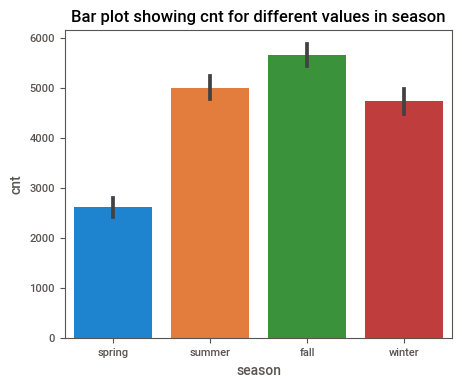

Analyzing column --- yr


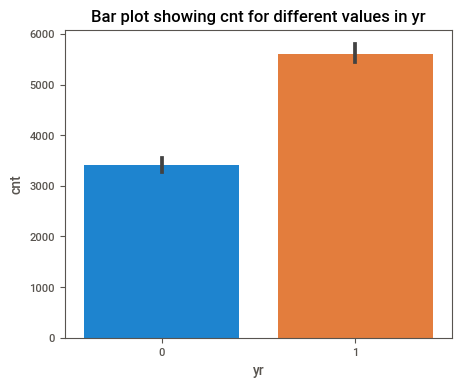

Analyzing column --- mnth


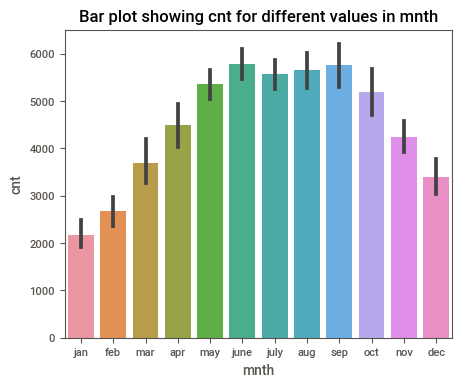

Analyzing column --- holiday


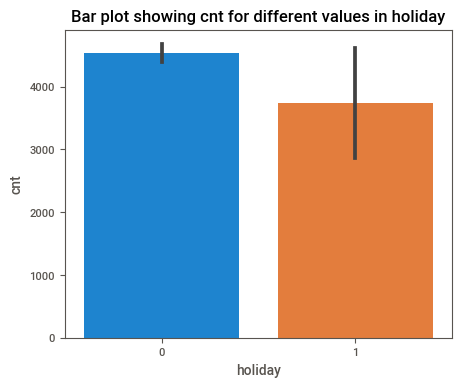

Analyzing column --- weekday


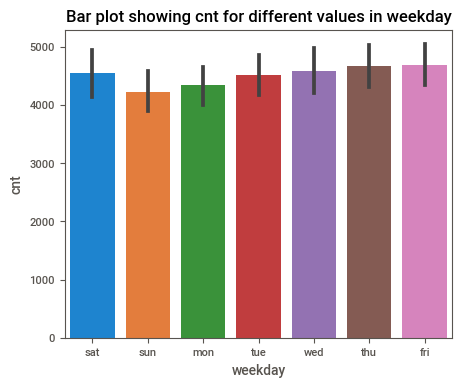

Analyzing column --- workingday


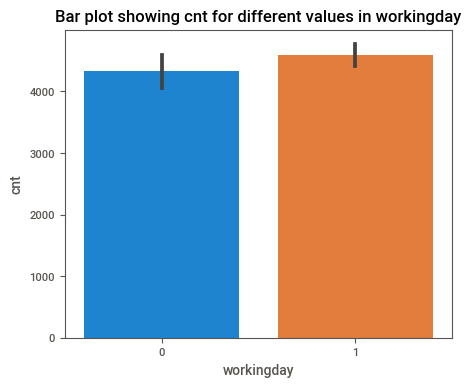

Analyzing column --- weathersit


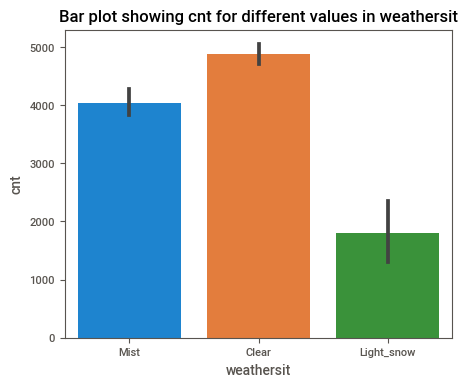

In [292]:
## Getting the categorical columns
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_columns:
    create_bar_plot_categorical(col)

In [293]:
### Plotting box plot for all the above categorical columns

def create_box_plot(column_name):
    print(f"Analyzing column BOX PLOT--- {column_name}")
    plt.figure(figsize=(5,4))
    sns.boxplot(x=column_name, y='cnt', data=bike_df)
    plt.title(f"Box plot showing cnt for different values in {column_name}")
    plt.show()

Analyzing column BOX PLOT--- season


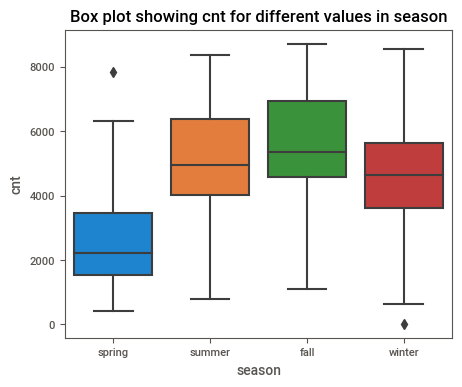

Analyzing column BOX PLOT--- yr


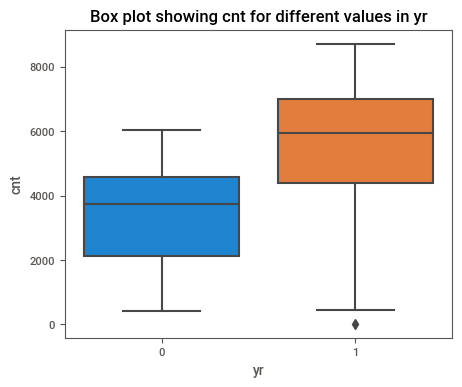

Analyzing column BOX PLOT--- mnth


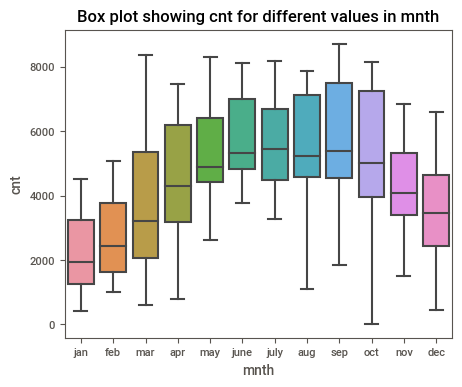

Analyzing column BOX PLOT--- holiday


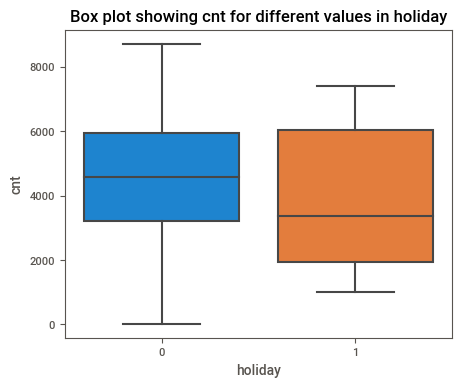

Analyzing column BOX PLOT--- weekday


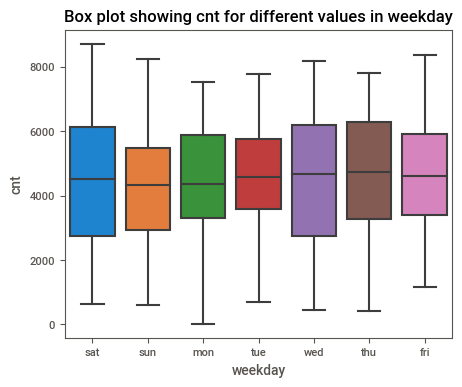

Analyzing column BOX PLOT--- workingday


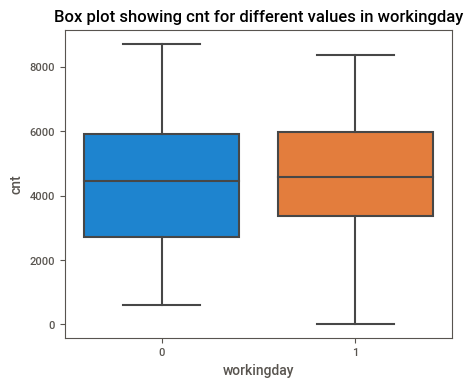

Analyzing column BOX PLOT--- weathersit


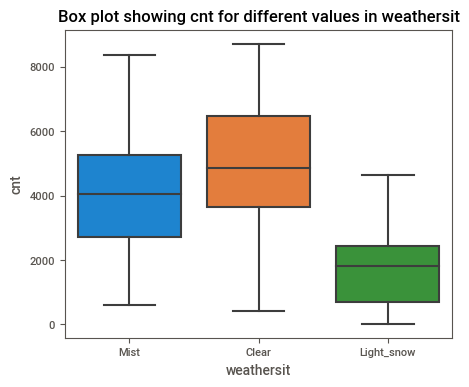

In [294]:
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_columns:
    create_box_plot(col)

### Insights
- For season type "fall" the rental count has been increased
- Year 2019 has more demands of rental bikes
- Demand increased from the month jan to jun and then we can see a fall of demands
- A working daya has more demand than that of an holiday
- A clear weather has the highest demand

### Co-rrelation of categorical fields with target field

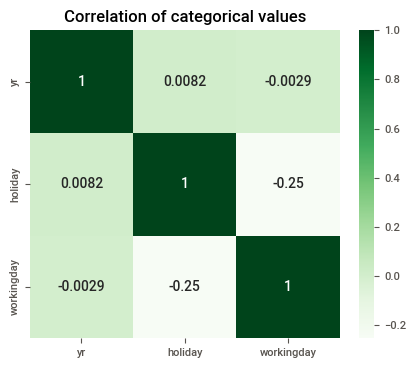

In [295]:
## lets analyze the correlation of categorical fields with target field cnt

### Plotting a heatmap

plt.figure(figsize=(5,4))
sns.heatmap(bike_df[categorical_columns].corr(), annot=True, cmap="Greens")
plt.title("Correlation of categorical values")
plt.show()


## Bivariate analysis for numerical fields

Numerical Columns
- temp
- atemp
- hum
- windspeed
- cnt

In [296]:
numerical_columns_for_pairplot = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

<Figure size 1000x1000 with 0 Axes>

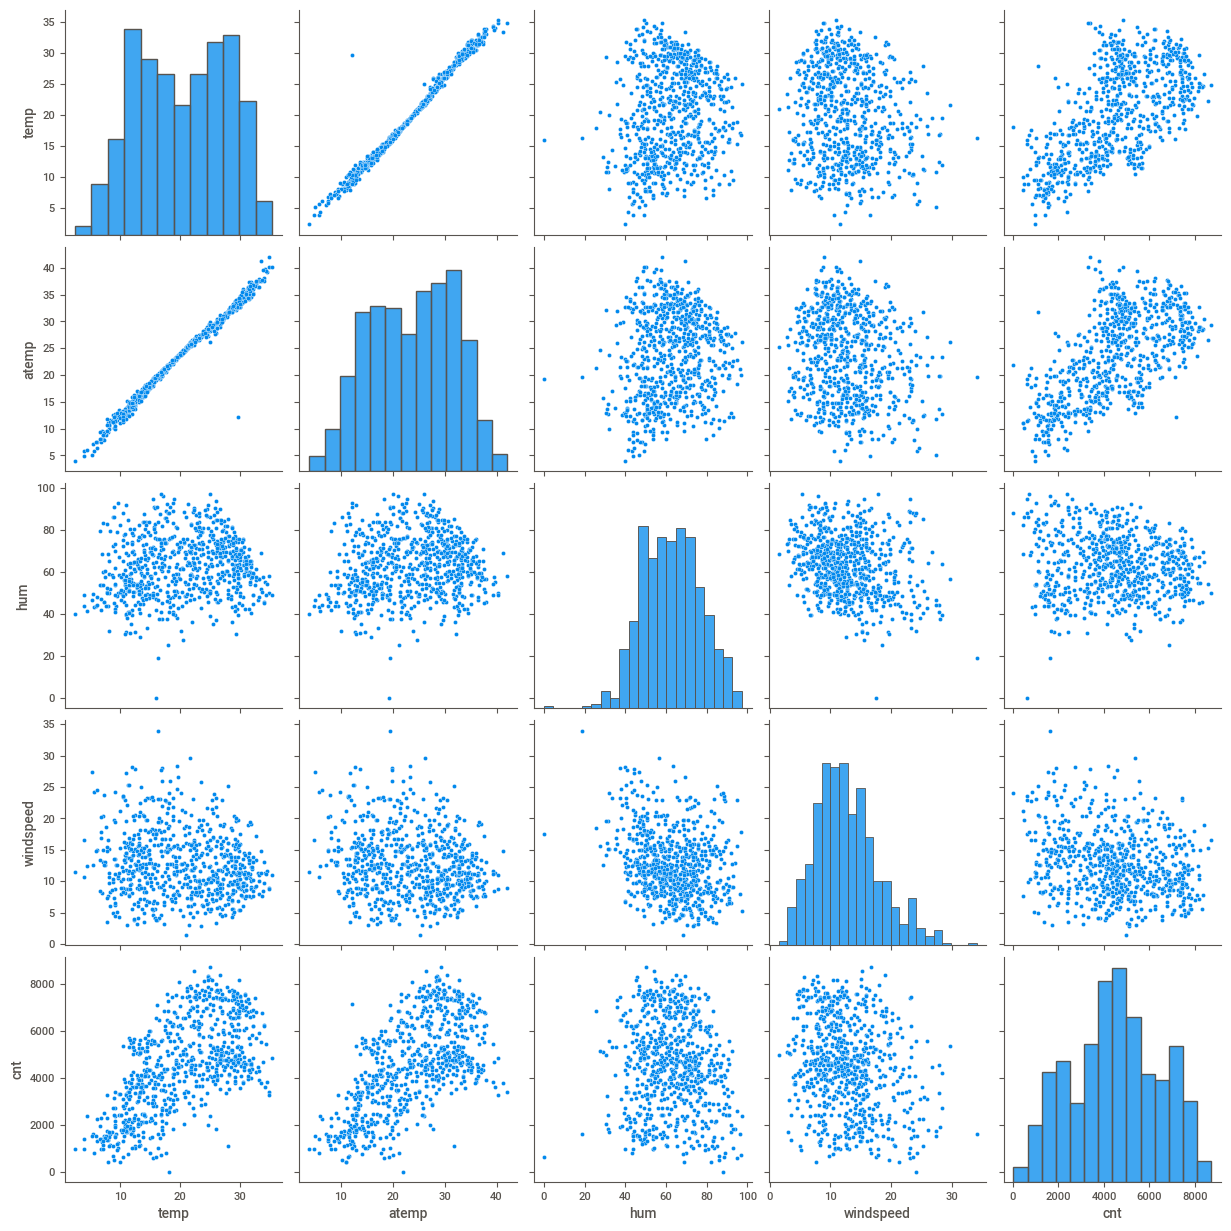

In [297]:
## Plotting pair plot for the above numerical columns

plt.figure(figsize=(10,10))
sns.pairplot(data=bike_df, vars=numerical_columns_for_pairplot)
plt.show()

### Insights
- temp and atemp has some correlation with column cnt

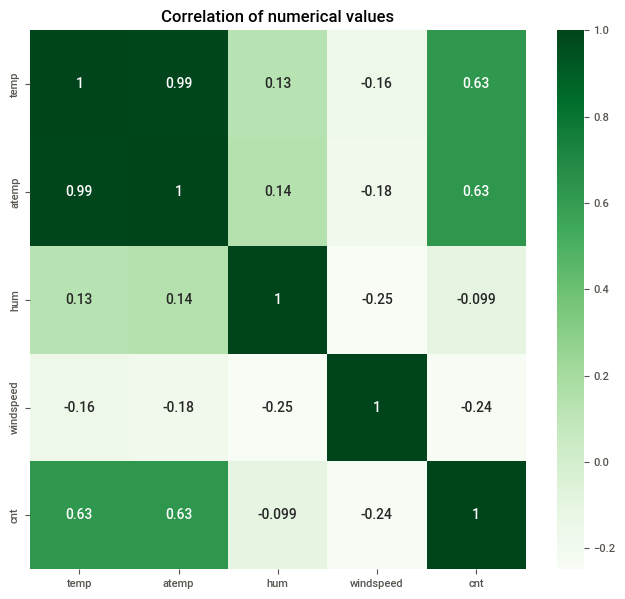

In [298]:
### Plotting a heatmap

plt.figure(figsize=(8,7))
sns.heatmap(bike_df[numerical_columns_for_pairplot].corr(), annot=True, cmap="Greens")
plt.title("Correlation of numerical values")
plt.show()

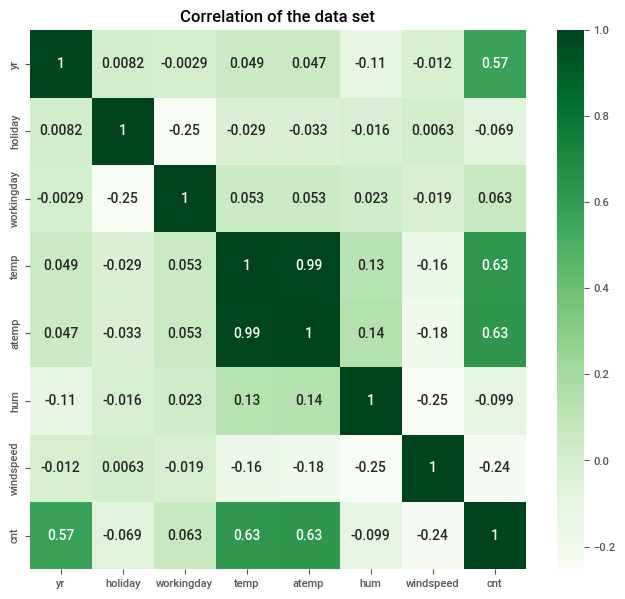

In [299]:
### Lets observe the correlation of the entire dataset

### Plotting a heatmap

plt.figure(figsize=(8,7))
sns.heatmap(bike_df.corr(), annot=True, cmap="Greens")
plt.title("Correlation of the data set")
plt.show()

# 7. MODEL BUILDING

### 7.1 Data Preparation
- Encoding
    - 1. Converting the binary value fields into 1/0
    - 2. Creating dummy variable for other categorical fields
- Splitting data into train and test
- Rescalling of variables

### ENCODING

### 1. Converting the binary value fields into 1/0

### Insights
 - Fields containing binary values are already assigned with 1's and 0's

### 2. Creating dummy variable for other categorical fields

## Dummy value creation

Below categorical fields can be considered for dummy variable creation
- mnth
- weekday
- season
- weathersit

In [300]:
## Creating dummy variable for mnth

months_dummies=pd.get_dummies(bike_df.mnth,drop_first=True)
bike_df = pd.concat([bike_df, months_dummies], axis=1)
bike_df[months_dummies.columns].head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [301]:
## Creating dummy variable for weekday

weekdays_dummies=pd.get_dummies(bike_df.weekday,drop_first=True)
bike_df = pd.concat([bike_df, weekdays_dummies], axis=1)
bike_df[weekdays_dummies.columns].head()



,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [302]:
## Creating dummy variable for weathersit

weathersit_dummies=pd.get_dummies(bike_df.weathersit,drop_first=True)
bike_df = pd.concat([bike_df, weathersit_dummies], axis=1)
bike_df[weathersit_dummies.columns].head()



,Light_snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [303]:
## Creating dummy variable for seasons

seasons_dummies=pd.get_dummies(bike_df.season,drop_first=True)
bike_df = pd.concat([bike_df, seasons_dummies], axis=1)
bike_df[seasons_dummies.columns].head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [304]:
### dropping the actual columns for the dummy creation fields

bike_df.drop(['mnth', 'season', 'weekday', 'weathersit'], axis=1, inplace=True)
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [305]:
## Analyzing the updated data set
print(bike_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   aug         730 non-null    uint8  
 9   dec         730 non-null    uint8  
 10  feb         730 non-null    uint8  
 11  jan         730 non-null    uint8  
 12  july        730 non-null    uint8  
 13  june        730 non-null    uint8  
 14  mar         730 non-null    uint8  
 15  may         730 non-null    uint8  
 16  nov         730 non-null    uint8  
 17  oct         730 non-null    uint8  
 18  sep         730 non-null    uint8  
 19  mon         730 non-null    u

In [306]:
print(bike_df.shape)

(730, 30)


### Insight
- the total columns now in the updated data set is 32

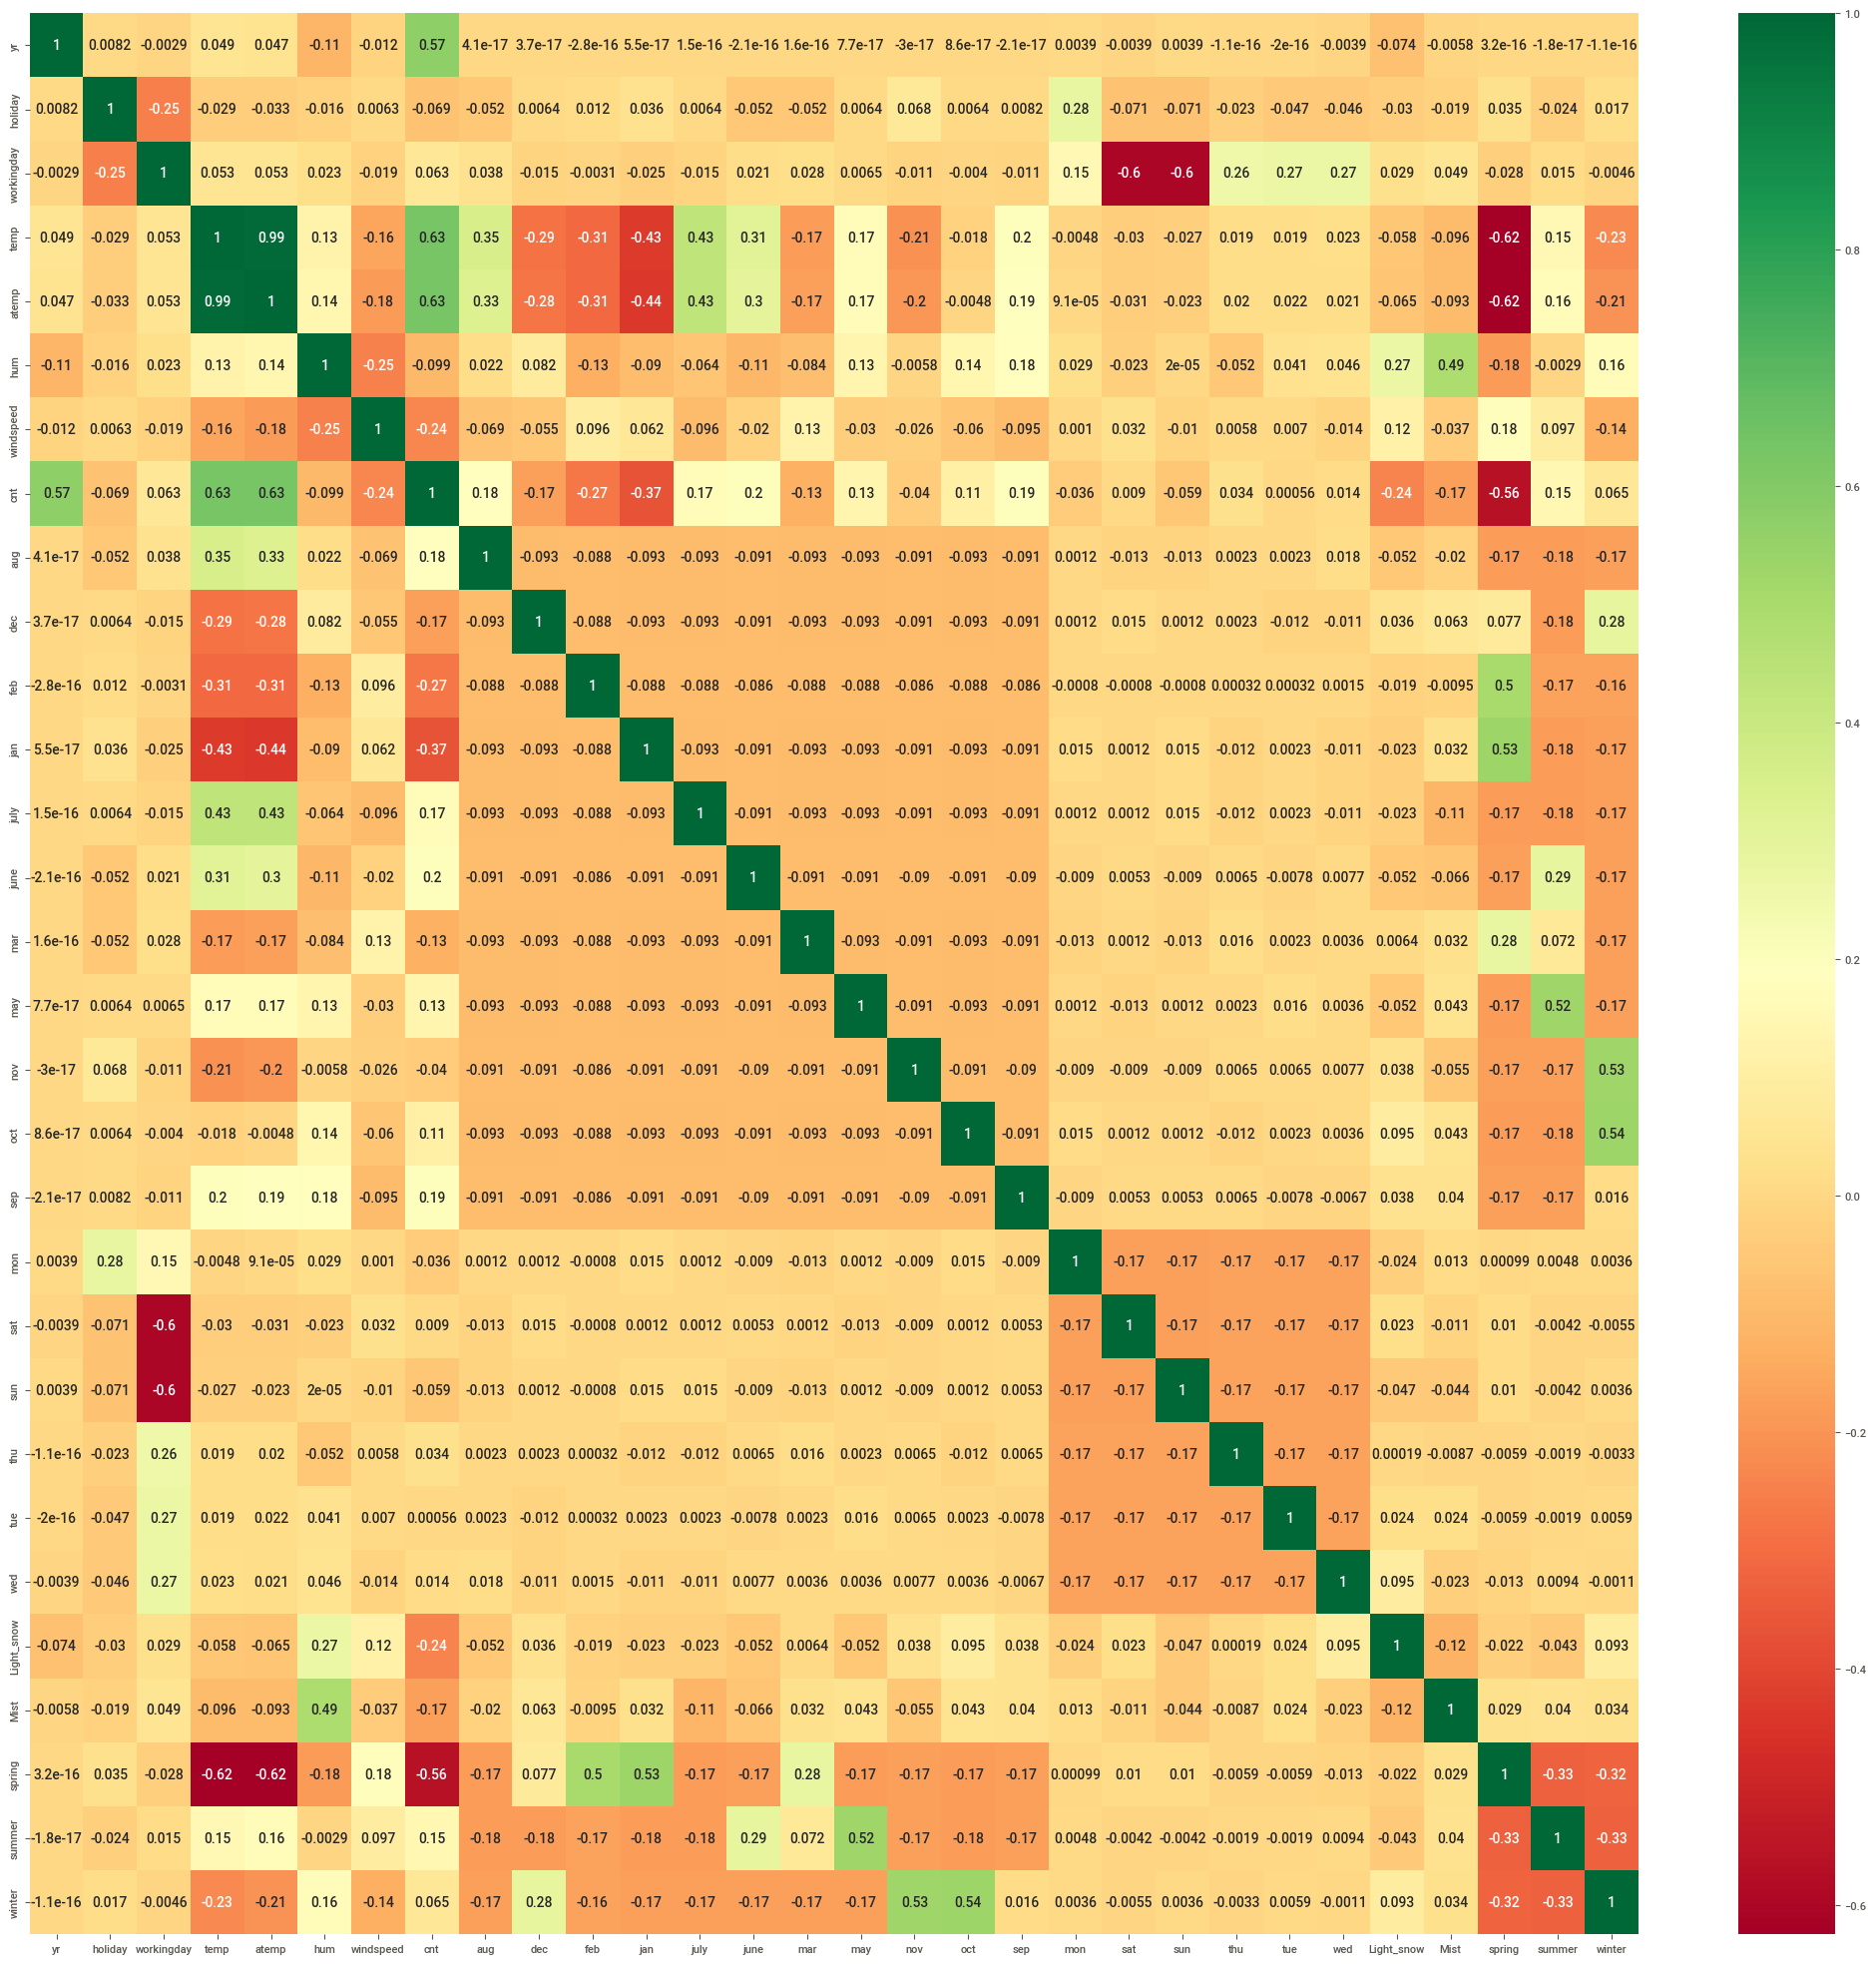

In [307]:
### Viewing the correlation for the new data set

plt.figure(figsize=(26,25))
sns.heatmap(bike_df.corr(), cmap="RdYlGn", annot=True)
plt.show()

### Insights
- cnt has a positive correlation with yr, temp, atemp
- Spring season for month Feb and Jan seems to have high positive correlation
- Summer season for May has high correlation
- Winter season of Oct and Nov have positive correlation
- Mist and Humidy have positive correlation of value - 0.48
- High Correlation exists between temp and atemp

In [308]:
## Dropping the column atemp as there is a very high correlation 0.99. THis is a case of mulicollinearity
bike_df.drop(['atemp'], axis=1, inplace=True)
bike_df.head()
bike_df

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
726,1,0,1,10.386653,59.0000,10.416557,3095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
727,1,0,0,10.386653,75.2917,8.333661,1341,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [309]:
## Lets view the list of columns for building model
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snow', 'Mist', 'spring', 'summer', 'winter'], dtype='object')

In [310]:
## Total column count
(bike_df.columns).size

29

### Splitting data into train and test

In [311]:
df_train, df_test = train_test_split(bike_df, train_size=0.7, random_state=100)

## Viewing the shape training set
print(f"Shape of training set - {df_train.shape}")

## Viewing the shape test set
print(f"Shape of test set - {df_test.shape}")

Shape of training set - (510, 29)
Shape of test set - (220, 29)


### insights
- data is segregated into train and test in the ratio of 70% to 30% 

### Visualizing on the training data set

In [312]:
## Visualization for the above correlation using scatter plot

def draw_scatter_plot_with_cnt_column(column_name):
    print('column name - ', column_name)
    plt.figure(figsize=(5,4))
    plt.scatter(df_train[column_name], df_train.cnt)
    plt.title(f'Scatter plot of {column_name} with cnt')
    plt.xlabel(column_name)
    plt.ylabel('Count of bikes')
    plt.show()

column name -  temp


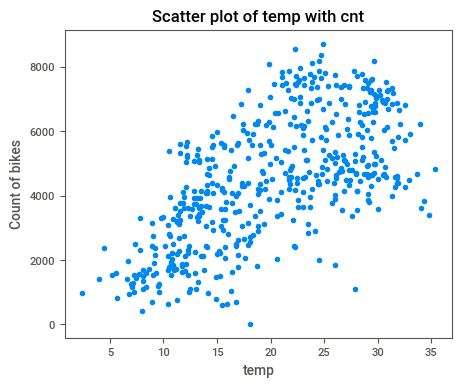

In [313]:
### scatter plot of temp with count
draw_scatter_plot_with_cnt_column('temp')

### insight
- cnt column can be seen to have a linear relationship with temp

## Rescalling of variables

In [314]:
# 1. Instatiate an object
scaler = MinMaxScaler()

# Create a list of numeric variables for scaling
num_vars = ['temp','hum','windspeed','cnt']


# 2. Fit on data for numerical columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


# 7. MODEL BUILDING

In [315]:
### Getting the X_train and y_train

### y_train will consist only the cnt variable
y_train = df_train.pop('cnt')

## X_train is the list of all independent variables, 
### except column cnt all avialable fields shall be in X_train
X_train = df_train

In [316]:
### Viewing the X_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [317]:
### Viewing the y_train
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

## 7.A : MODEL-A : Taking all the features

In [318]:
## Calculation of VIF

def calculate_VIF(dataframe):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [319]:
## Adding constant in statsmodel
X_train_lm_allFeatures = sm.add_constant(X_train)

## Calculating Ordinary Least Square
lr_all_features = sm.OLS(y_train, X_train_lm_allFeatures)

## fitting the model
lr_all_features = lr_all_features.fit()

## Getting the params
print(lr_all_features.params)

## Getting the summary
lr_all_features.summary()

const         0.243106
yr            0.232438
holiday       0.010042
workingday    0.096177
temp          0.445359
                ...   
Light_snow   -0.255835
Mist         -0.059551
spring       -0.044834
summer        0.043002
winter        0.107632
Length: 29, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.00e-181
Time:                        00:23:45   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2431      0.035      6.888      0.000       0.174       0.312
yr             0.2324      0.008     28.819      0.000       0.217       0.248
holiday        0.0100      0.024      0.418      0.676      -0.037       0.057
workingday     0.0962      0.012      7.835      0.000       0.072       0.120
temp           0.4454      0.046      9.628      0.000       0.354       0.536
hum           -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed     -0.1860      0.026     -7.226      0.000      -0.237      -0.135
aug            0.0204      0.034      0.607      0.544      -0.046       0.086
dec           -0.0443      0.034     -1.317      0.189      -0.110       0.022
feb           -0.0324      0.033     -0.985      0.325      -0.097       0.032
jan           -0.0633      0.034     -1.885      0.060      -0.129       0.003
july          -0.0338      0.035     -0.969      0.333      -0.102       0.035
june           0.0046      0.025      0.186      0.853      -0.044       0.053
mar            0.0013      0.025      0.052      0.959      -0.047       0.050
may            0.0247      0.021      1.173      0.241      -0.017       0.066
nov           -0.0399      0.036     -1.096      0.274      -0.111       0.032
oct            0.0075      0.036      0.210      0.834      -0.063       0.078
sep            0.0859      0.032      2.692      0.007       0.023       0.149
mon           -0.0209      0.015     -1.365      0.173      -0.051       0.009
sat            0.0956      0.014      6.958      0.000       0.069       0.123
sun            0.0413      0.014      2.964      0.003       0.014       0.069
thu           -0.0091      0.016     -0.588      0.557      -0.040       0.021
tue           -0.0179      0.016     -1.156      0.248      -0.048       0.013
wed           -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light_snow    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist          -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring        -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer         0.0430      0.026      1.645      0.101      -0.008       0.094
winter         0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     7.00e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [320]:
calculate_VIF(X_train)

,Features,VIF
2,workingday,85.54
18,sat,19.71
19,sun,18.34
25,spring,10.75
27,winter,9.44
...,...,...
21,tue,1.79
24,Mist,1.60
23,Light_snow,1.29
5,windspeed,1.24


### insights - 
- R-square value is around 0.853, which is quite a good value
- However few of the VIF values are marked as quite high, i.e., a strong multicollinearity exits
- Surely this model can be optimised by reducing the features

## 7.B : MODEL -  B: Building a linear model both by automated and manual approch

 - Lets start with building with an automated approach using <b>RFE</b> on the <b>training</b> data set
 - Selecting the feature count as 16

### Feature Elimination using RFE

In [321]:
### creation of a linearRegression object
lrm = LinearRegression()

### Fitting the object
lrm.fit(X_train, y_train)

### Lets take an estimate column count as 16
rfe = RFE(lrm, n_features_to_select=16)
rfe = rfe.fit(X_train, y_train)

In [322]:
### List of variables selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 6),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 13),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 8),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 9),
 ('wed', False, 12),
 ('Light_snow', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [323]:
# selecting the selected variable via RFE in col list

rfe_col = X_train.columns[rfe.support_]
print(rfe_col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan', 'july', 'sep', 'sat', 'sun', 'Light_snow', 'Mist', 'spring', 'summer', 'winter'], dtype='object')


In [324]:
## Viewing the columns not selected 
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon', 'thu', 'tue', 'wed'], dtype='object')

In [325]:
### rfe dataframe
X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,jan,july,sep,sat,sun,Light_snow,Mist,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,1,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,1,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,0,1,0,1,0


In [326]:
### VIF calculation
calculate_VIF(X_train_rfe)

,Features,VIF
2,workingday,52.28
9,sat,12.58
10,sun,12.11
13,spring,5.08
3,temp,3.89
15,winter,3.59
1,holiday,2.97
14,summer,2.65
4,hum,1.91
6,jan,1.57


In [327]:
def build_stats_model(X_train_for_model):
    ## adding a constant to the model
    X_train_sm = sm.add_constant(X_train_for_model)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

### Model - 1 : Including all the columns selected by RFE approach

In [328]:
X_train_1 = X_train_rfe
X_train_model_1 = sm.add_constant(X_train_rfe)
lm_1 = sm.OLS(y_train,X_train_model_1).fit()
print(lm_1.summary())

print(calculate_VIF(X_train_1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          4.22e-191
Time:                        00:23:45   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2093      0.028      7.458      0.0

### Insights of Model-1
- R-square is 0.848 , around 84.8% of data can be explained by this model
- Probability of F-statistic is quite low, which is also good for a model
- Probality of holiday is quite high 
- VIF for working day is high

### Model - 2 : Dropping column `workingday`
- As probability of holiday is also high and VIF for workingday is also high, we take the precedence of dropping the high VIF over the field having high probability

In [329]:

## training data set post dropping column workingday
X_train_2 = X_train_rfe.drop(['workingday'], axis=1)

X_train_model_2 = sm.add_constant(X_train_2)
lm_2 = sm.OLS(y_train,X_train_model_2).fit()
print(lm_2.summary())

print(calculate_VIF(X_train_2))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          4.22e-191
Time:                        00:23:45   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2952      0.035      8.545      0.0

### Insights of Model-2
- R-square value remained as as of model-1
- VIF for humidity column is high

### Model - 3 : Dropping column `hum`
- Hum have a very high VIF value

In [330]:

## training data set post dropping column hum
X_train_3 = X_train_2.drop(['hum'], axis=1)

X_train_model_3 = sm.add_constant(X_train_3)
lm_3 = sm.OLS(y_train,X_train_model_3).fit()
print(lm_3.summary())

print(calculate_VIF(X_train_3))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.60e-188
Time:                        00:23:45   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2200      0.030      7.332      0.0

### Insights of Model-3
- R-square value very slightly decreased
- column sat has a high p value
- VIF for temp column is slightly high

### Model - 4 : Dropping column `sat`
- Saturday has a very high p-value, so dropping it

In [331]:

## training data set post dropping column sat
X_train_4 = X_train_3.drop(['sat'], axis=1)

X_train_model_4 = sm.add_constant(X_train_4)
lm_4 = sm.OLS(y_train,X_train_model_4).fit()
print(lm_4.summary())

print(calculate_VIF(X_train_4))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.91e-189
Time:                        00:23:45   Log-Likelihood:                 510.17
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     496   BIC:                            -933.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2224      0.030      7.429      0.0

### Insights of Model-4
- R-square value not much changed
- column jan has a slightly high p value
- VIF for temp column is slightly high

### Model - 5 : Dropping column `jan`
- jan has a slightly high p-value, so dropping it

In [332]:

## training data set post dropping column jan
X_train_5 = X_train_4.drop(['jan'], axis=1)

X_train_model_5 = sm.add_constant(X_train_5)
lm_5 = sm.OLS(y_train,X_train_model_5).fit()
print(lm_5.summary())

print(calculate_VIF(X_train_5))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.45e-189
Time:                        00:23:45   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2060      0.029      7.074      0.0

### Insights of Model-5
- R-square value did not vary much

### Model - 6 : lets Drop column `temp`
- will observe all the statictics dropping column temp as it has slightly high VIF

In [333]:

## training data set post dropping column temp
X_train_6 = X_train_5.drop(['temp'], axis=1)

X_train_model_6 = sm.add_constant(X_train_6)
lm_6 = sm.OLS(y_train,X_train_model_6).fit()
print(lm_6.summary())

print(calculate_VIF(X_train_model_6))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.55e-150
Time:                        00:23:45   Log-Likelihood:                 412.38
No. Observations:                 510   AIC:                            -800.8
Df Residuals:                     498   BIC:                            -749.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5901      0.017     35.272      0.0

### Insights of Model-6
- R-square value reduced a lot
- We cannot remove this column <b>'temp'</b>
- p value for july is too high
- will drop july in the next model and observe

### Model - 7 : lets Drop column `july` and add back `temp`
- will build this model on top of model-5 
- As july in model-6 had a high p value will drop this column and observe

In [334]:

## training data set post dropping column july
X_train_7 = X_train_5.drop(['july'], axis=1)

X_train_model_7 = sm.add_constant(X_train_7)
lm_7 = sm.OLS(y_train,X_train_model_7).fit()
print(lm_7.summary())

print(calculate_VIF(X_train_7))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.23e-189
Time:                        00:23:45   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1981      0.029      6.794      0.0

### Insights of Model-7
- R-square value did not reduced a much, still a great value
- p values for all features are nearly 0
- VIF value for all fields are less than 5

### Model - 8 : lets Drop column `sun`

In [335]:

## training data set post dropping column sun
X_train_8 = X_train_7.drop(['sun'], axis=1)

X_train_model_8 = sm.add_constant(X_train_8)
lm_8 = sm.OLS(y_train,X_train_model_8).fit()
print(lm_8.summary())

print(calculate_VIF(X_train_8))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.47e-186
Time:                        00:23:45   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1909      0.030      6.447      0.0

### Insights of Model-8
- R-square value did not reduced a much, still a great value
- p values for all features are nearly 0
- VIF value for all fields are less than 5
- Model-7 and Model-8 can be considered as good models

### Model - 9 : lets Drop column `spring`
- as it has a slightly high p value

In [336]:
### Building model on top of Model-7

## training data set post dropping column sep
X_train_9 = X_train_8.drop(['spring'], axis=1)

X_train_model_9 = sm.add_constant(X_train_9)
lm_9 = sm.OLS(y_train,X_train_model_9).fit()
print(lm_9.summary())

print(calculate_VIF(X_train_9))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.83e-186
Time:                        00:23:45   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1259      0.017      7.508      0.0

### Insights
- r-sqaure value not reduced much, still can be considered good
- VIF values are below 5
- p values are nearly 0

### Model - 10 : lets Drop column `holiday`
- as we have seen in the barplot no significant dfference in count for  a holiday and non-holiday

In [337]:

## training data set post dropping column sep
X_train_10 = X_train_9.drop(['holiday'], axis=1)

X_train_model_10 = sm.add_constant(X_train_10)
lm_10 = sm.OLS(y_train,X_train_model_10).fit()
print(lm_10.summary())

print(calculate_VIF(X_train_10))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     296.5
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.53e-184
Time:                        00:23:45   Log-Likelihood:                 484.24
No. Observations:                 510   AIC:                            -950.5
Df Residuals:                     501   BIC:                            -912.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1209      0.017      7.140      0.0

### Insights
- VIF reduced a bit more 
- Model-9 con be considered good

### Model Building Insights
- Model 9 showed good results
- We shall analyse the predictions on Model-9
- Model 9 stats
    - F-statistic value of 271.9
    - All p values for all the predictors are 0 showing that all fields are significant
    - F-statistic probability is also nearly equal to 0
    - r-square value is 0.830
    - adjusted r-square value is 0.827

## Prediction 1: Predicting the model using Model-9 on training set

In [338]:
### Getting the parameters and the coefficiets
lm_9.params

const         0.125926
yr            0.232861
holiday      -0.098685
temp          0.548008
windspeed    -0.153246
sep           0.101195
Light_snow   -0.282869
Mist         -0.078375
summer        0.088080
winter        0.129345
dtype: float64

# 8. Model Evaluation

## 8.1 Residual Analysis

In [339]:
## view the X_train for the selected model
X_train_model_9.shape

(510, 10)

### Predicting y_train

In [340]:

y_train_pred_mod9 = lm_9.predict(X_train_model_9)
y_train_pred_mod9.head()

576    0.764943
426    0.483717
728    0.391485
482    0.556437
111    0.266762
dtype: float64

### View the Normality of error terms

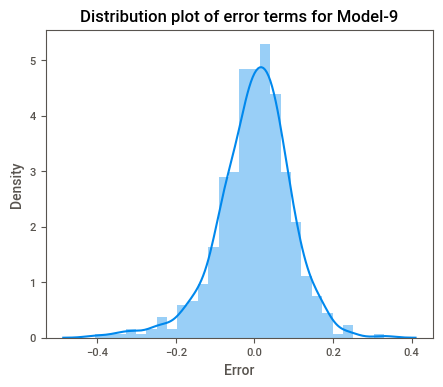

In [341]:
## plotting the histogram for the error terms

plt.figure(figsize=(5,4))
sns.distplot((y_train - y_train_pred_mod9))
plt.xlabel("Error")
plt.title("Distribution plot of error terms for Model-9")
plt.show()

### Insight
- Error terms are normally distributed

### Checking for Multi-Colinearity

In [342]:
calculate_VIF(X_train_9)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
7,summer,1.57
6,Mist,1.48
8,winter,1.37
4,sep,1.20
5,Light_snow,1.08
1,holiday,1.04


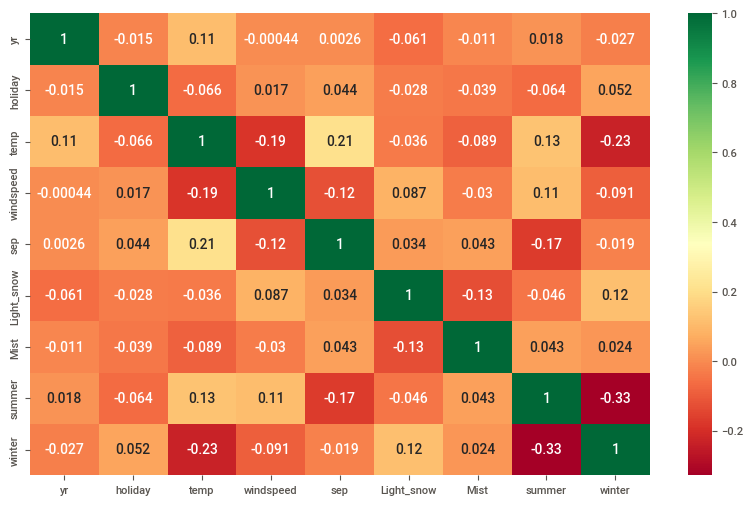

In [343]:
plt.figure(figsize=(10, 6))
sns.heatmap(X_train_9.corr(), annot=True, cmap="RdYlGn")
plt.show()

### insight
- No such high linearity is observed from the heat map

### Comparing Actual vs Predicted values through line and scatter plots

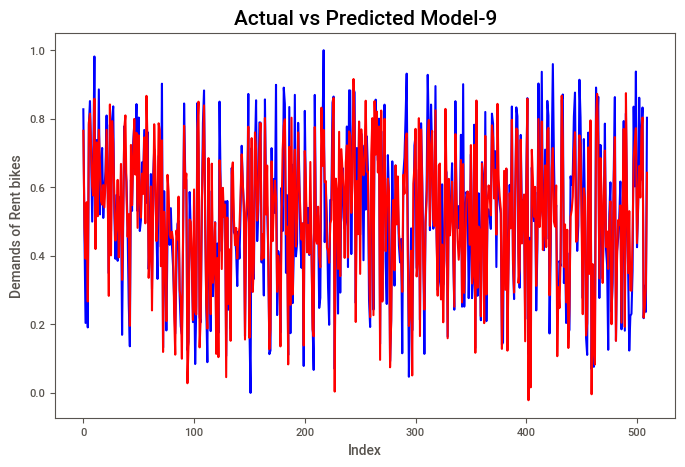

In [344]:
## Comparing the actual y_train values with the predicted y_train values
## predicted y_train values - y_train_pred calculated above

c = [i for i in range(0,len(X_train_7),1)]
plt.figure(figsize=(8,5))
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred_mod9, color="red")
plt.title('Actual vs Predicted Model-9', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands of Rent bikes')
plt.show()

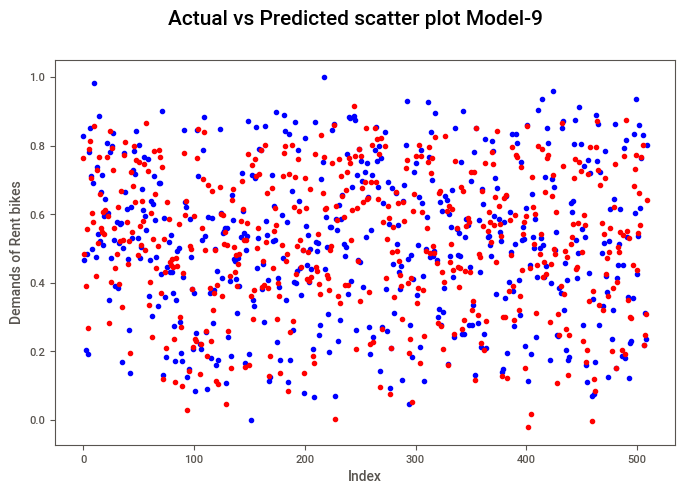

In [345]:
plt.figure(figsize=(8,5))
plt.scatter(c,y_train, color="blue")
plt.scatter(c,y_train_pred_mod9, color="red")
plt.suptitle('Actual vs Predicted scatter plot Model-9', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands of Rent bikes')
plt.show()

### Homoscedasticity

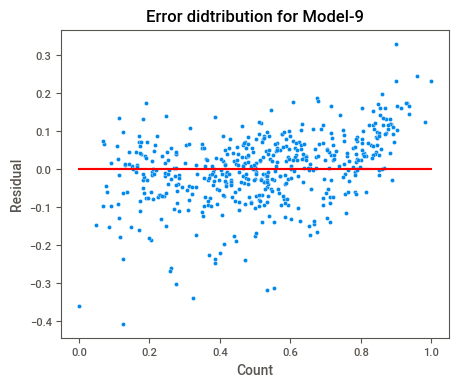

In [346]:
plt.figure(figsize=(5,4))
residual = y_train - y_train_pred_mod9
sns.scatterplot(x=y_train,y=residual)

plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.title('Error didtribution for Model-9')
plt.show()

### Insights
- Error terms are randomly distributed
- No patterns are found in the error plots

### Calculating the R-square for predicted value

In [347]:
r2_score_train_pred_mod9 = r2_score(y_train, y_train_pred_mod9)
print(r2_score_train_pred_mod9)

0.8303450237489229


### insights
- r-square value obtained from model-9 is 0.830
- r-square value for the predicted is 0.830
- r-square of the predicted nearly same as obtained from the model

# Making Predictions using the Model-9 on test set

In [348]:
X_train_9.head(2)

,yr,holiday,temp,windspeed,sep,Light_snow,Mist,summer,winter
576,1,0,0.815169,0.264686,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,1,0,0


In [349]:
## Getting list of numerical columns

num_columns = ['temp', 'hum', 'windspeed','cnt']

## Assigning df_test data set to a new variable
df_test_9 = df_test.copy()

df_test_9[num_columns] = scaler.transform(df_test_9[num_columns])
df_test_9.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [350]:
## Creating y_test and X_test

y_test = df_test_9.pop('cnt')
X_test = df_test_9

In [351]:
## Getting all the columns selected in Model-9
model_9_col = X_train_9.columns
print(model_9_col)

## Creating the X_test for Model-7 column list
X_test_9 = X_test[model_9_col]


# Adding constant variable to test dataframe
X_test_9_sm = sm.add_constant(X_test_9)

Index(['yr', 'holiday', 'temp', 'windspeed', 'sep', 'Light_snow', 'Mist', 'summer', 'winter'], dtype='object')


In [352]:
## Predicting y for model-9
y_pred_9 = lm_9.predict(X_test_9_sm)

In [353]:
## Calculating r2-score
r2_model_9 = r2_score(y_test, y_pred_9)
print(round(r2_model_9, 4))

0.7942


In [354]:
## Calculating MSE
MSE_9 = mean_squared_error(y_test, y_pred_9)
print(MSE_9)

0.00984028613513323


### insights
- The Model-9 predicted a r2 score of 0.7942 on the test set
- The MSE calculated is 0.00984

## Model-9 Evaluation

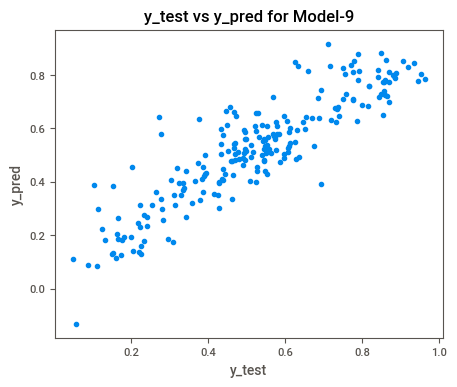

In [355]:
## Plotting a scatter plot

plt.figure(figsize=(5,4))
plt.scatter(y_test,y_pred_9)
plt.title('y_test vs y_pred for Model-9')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

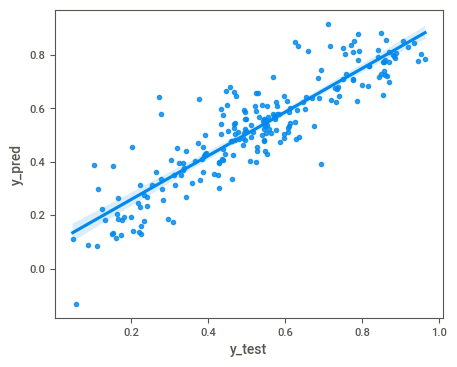

In [356]:
## Plotting a regression plot

plt.figure(figsize=(5,4))
sns.regplot(x=y_test, y=y_pred_9)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

## Comparing Train and Test dataset for Model-9

- Train set -> r-square - 0.8303
- Test set -> r-square - 0.7942

## MODEL - C : Building model by RFE and statsmodel taking input feature count as 8

In [357]:
### creation of a linearRegression object
lrm = LinearRegression()

### Fitting the object
lrm.fit(X_train, y_train)

### Lets take an estimate column count as 16
rfe = RFE(lrm, n_features_to_select=8)
rfe = rfe.fit(X_train, y_train)

In [358]:
### List of variables selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 2),
 ('windspeed', True, 1),
 ('aug', False, 14),
 ('dec', False, 11),
 ('feb', False, 12),
 ('jan', False, 9),
 ('july', False, 4),
 ('june', False, 19),
 ('mar', False, 21),
 ('may', False, 13),
 ('nov', False, 10),
 ('oct', False, 16),
 ('sep', False, 6),
 ('mon', False, 15),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 18),
 ('tue', False, 17),
 ('wed', False, 20),
 ('Light_snow', True, 1),
 ('Mist', False, 5),
 ('spring', False, 3),
 ('summer', False, 8),
 ('winter', False, 7)]

In [359]:
# selecting the selected variable via RFE in col list

rfe_col = X_train.columns[rfe.support_]
print(rfe_col)

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'sat', 'sun', 'Light_snow'], dtype='object')


In [360]:
### rfe dataframe
X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,yr,holiday,workingday,temp,windspeed,sat,sun,Light_snow
576,1,0,1,0.815169,0.264686,0,0,0
426,1,0,0,0.442393,0.255342,1,0,0
728,1,0,0,0.245101,0.663106,0,1,0
482,1,0,0,0.395666,0.188475,1,0,0
111,0,0,1,0.345824,0.380981,0,0,0


In [361]:
## Inital Model
X_train_model_B0 = sm.add_constant(X_train_rfe)
lm_B0 = sm.OLS(y_train,X_train_model_B0).fit()
print(lm_B0.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     210.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          4.78e-145
Time:                        00:23:47   Log-Likelihood:                 388.60
No. Observations:                 510   AIC:                            -761.2
Df Residuals:                     502   BIC:                            -727.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1137      0.015      7.337      0.0

In [362]:
### VIF calculation
calculate_VIF(X_train_rfe)

,Features,VIF
2,workingday,9.15
5,sat,2.83
6,sun,2.66
1,holiday,1.26
3,temp,1.06
4,windspeed,1.05
0,yr,1.02
7,Light_snow,1.01


## MODEL - C : Model-1
- Dropping column `workingday` as having high VIF

In [363]:
## training data set post dropping column workingday
X_train_B1 = X_train_rfe.drop(['workingday'], axis=1)

X_train_model_B1 = sm.add_constant(X_train_B1)
lm_B1 = sm.OLS(y_train,X_train_model_B1).fit()
print(lm_B1.summary())

print(calculate_VIF(X_train_B1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     210.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          4.78e-145
Time:                        00:23:47   Log-Likelihood:                 388.60
No. Observations:                 510   AIC:                            -761.2
Df Residuals:                     502   BIC:                            -727.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1684      0.019      9.081      0.0

### insights - 
- the R-square value remained the same as previous
- saturday have a high p-value of around - 0.359
- will drop this column `sat` in the next model

## MODEL - C : Model-2
- Dropping column `sat` as having high P value

In [364]:
## training data set post dropping column workingday
X_train_B2 = X_train_B1.drop(['sat'], axis=1)
print(X_train_B2.columns)

X_train_model_B2 = sm.add_constant(X_train_B2)
lm_B2 = sm.OLS(y_train,X_train_model_B2).fit()
print(lm_B2.summary())

print(calculate_VIF(X_train_B2))

Index(['yr', 'holiday', 'temp', 'windspeed', 'sun', 'Light_snow'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     246.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          4.44e-146
Time:                        00:23:47   Log-Likelihood:                 388.17
No. Observations:                 510   AIC:                            -762.3
Df Residuals:                     503   BIC:                            -732.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

### insights - 
- the R-square value remained the same as previous

## MODEL - C : Model-3
- Lets remove one more feature `holiday`

In [365]:
## training data set post dropping column workingday
X_train_B3 = X_train_B2.drop(['holiday'], axis=1)

X_train_model_B3 = sm.add_constant(X_train_B3)
lm_B3 = sm.OLS(y_train,X_train_model_B3).fit()
print(lm_B3.summary())

print(calculate_VIF(X_train_B3))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     290.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          6.50e-146
Time:                        00:23:47   Log-Likelihood:                 384.85
No. Observations:                 510   AIC:                            -757.7
Df Residuals:                     504   BIC:                            -732.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1665      0.018      9.084      0.0

In [366]:
lm_B3.params

const         0.166482
yr            0.233706
temp          0.553014
windspeed    -0.177508
sun          -0.038165
Light_snow   -0.219561
dtype: float64

### insights 
 - The r-square value reduced a very small value from 0.746 to 0.742

## Lets use the model3 and predict and analyse the result

### Residual analysis

In [367]:
X_train_model_B3.head()

,const,yr,temp,windspeed,sun,Light_snow
576,1.0,1,0.815169,0.264686,0,0
426,1.0,1,0.442393,0.255342,0,0
728,1.0,1,0.245101,0.663106,1,0
482,1.0,1,0.395666,0.188475,0,0
111,1.0,0,0.345824,0.380981,0,0


In [368]:
y_train_pred_mod3 = lm_B3.predict(X_train_model_B3)

### Normality of Error terms

<AxesSubplot: ylabel='Density'>

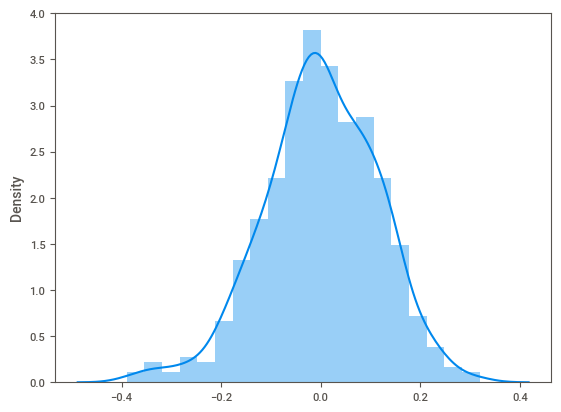

In [369]:
# histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred_mod3), bins = 20) 

### Multi-Collinearity

In [370]:
calculate_VIF(X_train_B3)

,Features,VIF
1,temp,3.10
2,windspeed,2.76
0,yr,1.98
3,sun,1.15
4,Light_snow,1.04


### correlation

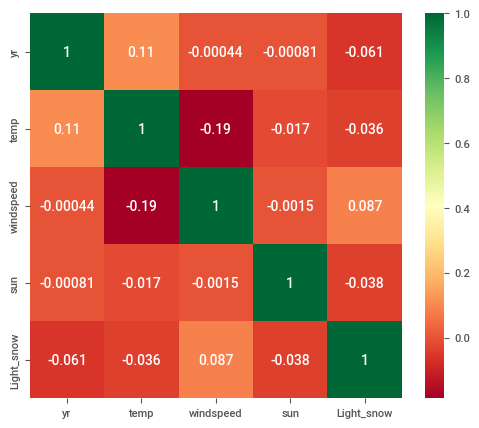

In [371]:
plt.figure(figsize=(6,5))
sns.heatmap(X_train_B3.corr(),annot = True, cmap="RdYlGn")
plt.show()

### Homoscedasticity

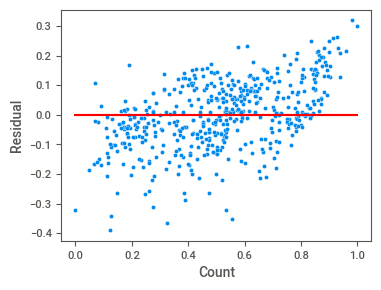

In [372]:

residual = y_train - y_train_pred_mod3
plt.figure(figsize=(4,3))
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### insight - 
- Some kind of linearity exists on hige=her side of the count
- This model may nt be correct to proceed

## Predictions on the Test set

In [373]:
num_vars = ['temp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [374]:
y_test = df_test.pop('cnt')
X_test = df_test

In [375]:
col1 = X_train_B3.columns

X_test_B3 = X_test[col1]

# Adding constant variable to test dataframe
X_test_B3 = sm.add_constant(X_test_B3)

In [376]:
y_pred_B3 = lm_B3.predict(X_test_B3)

In [377]:
r2 = r2_score(y_test, y_pred_B3)
round(r2,4)

0.6952

In [378]:
## Calculating MSE
MSE_B3 = mean_squared_error(y_test, y_pred_B3)
print(MSE_B3)

0.014571819580649839


### insight
- MSE value is quite large as compared to Model-9 predicted above.

## Model Evaluation

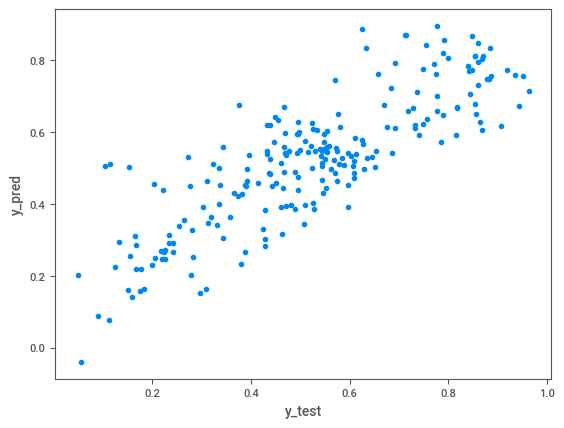

In [379]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_B3)

plt.xlabel('y_test')
plt.ylabel('y_pred') 
plt.show()

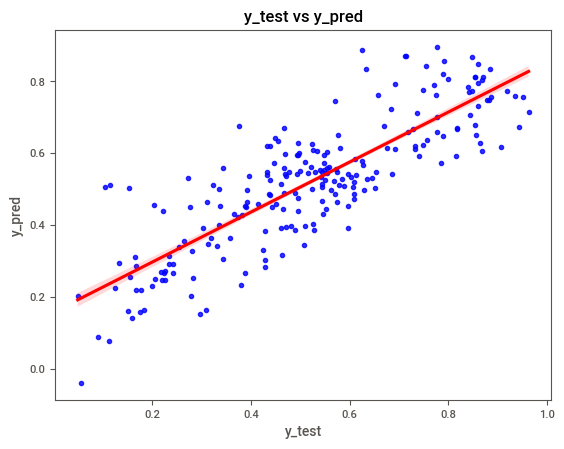

In [380]:
# Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred_B3, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

### Final insight of MODEL - C
- The model has a low r-sqaure value as compared to MODEL- 9 under MODEL-B
- The MSE value is quite higher
- The error terms follow some kind of pattern 

## Final Insights
 - Model 9 is selected from MODEL-B as it has a good r-square value
 - All the feature VIF values are well within 5
 - p value of all the features are nearly 0 , all fields are significant
 - MSE is calculated 0.009840
 - Driving Features for this model - 
     - temp
     - windspeed
     - yr
     - summer
     - winter
     - Mist
     - sep
     - Light_snow
     - holiday
 - Performed the Predictions on test set and the r-square value comes nearly close.
 - Residual analysis is done, the error terms are normally distributed
 - Multicollinearity between the features does not exists
 - Model 9 is evaluated and the regression plot shows a linear relationship with y_pred and y_test

1. As the temperaturte increses the demand of bikes also increases
2. For windspeed in the range 5-15 the demand increases, however it decreases beyond the point of 15
3. Variables - Holiday, Windspeed, Light_snow and Mist have an negative impact on the demands
4. On the other hand temperature, season have a positive relationship
5. Every year the demand of the bikes are increasing
